In [3]:
from dateutil.parser import parse 
import matplotlib as mpl
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df=pd.read_table("/Users/wekao/Downloads/0903/TrainSet.txt")
df

,Compound Identifier,Odor,Replicate,Intensity,Dilution,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",1,7,62.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,4-Hydroxybenzaldehyde,NaN,high,1/10,1,37,60.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",2,55,89.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,126,4-Hydroxybenzaldehyde,NaN,high,1/10,2,64,71.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",3,89,68.0,0.0,62.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35079,6999977,Butyl (S)-(-)-lactate,NaN,high,"1/1,000",47,42,77.0,56.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35080,6999977,Butyl (S)-(-)-lactate,NaN,low,"1/100,000",48,0,72.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35081,6999977,Butyl (S)-(-)-lactate,NaN,high,"1/1,000",48,22,96.0,0.0,58.0,...,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
35082,6999977,Butyl (S)-(-)-lactate,NaN,low,"1/100,000",49,72,9.0,0.0,0.0,...,0.0,0.0,19.0,9.0,0.0,2.0,0.0,0.0,0.0,3.0


In [4]:
df_low_dilution = df[df['Intensity'] == 'low ']
df_high_dilution = df[df['Intensity'] == 'high ']
low_pleasantness=df_low_dilution['VALENCE/PLEASANTNESS'].dropna()
high_pleasantness=df_high_dilution['VALENCE/PLEASANTNESS'].dropna()

In [5]:
#Question:
#Are pleasantness scores consistent across subjects? 
#do subjects have similar pleasantness score in between high and low dilution?
#Do all subjects enjoy the same odorants?
# Every person has a pleasantness score for every odor
#look for which is the maximum for every person--> see if that corresponds to the same odor
#(group low and group high dilution)

17542
10760
17542
15220
[454.38202678] [2.14880272e-99]
the null hypothesis can be rejected
[2679.88739766] [0.]
the null hypothesis can be rejected


'high_pleasantness does not come from a normal distribution'

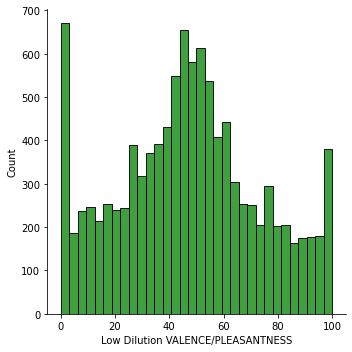

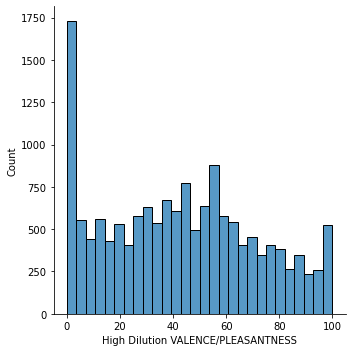

In [6]:
#plt.rcdefaults()
# df_low_dilution is separated from original df
#check pleasantness in low and high dilution group from each subject
print(len(df_low_dilution['VALENCE/PLEASANTNESS']))
low_pleasantness=df_low_dilution['VALENCE/PLEASANTNESS'].dropna()#remove Nan in this list
print(len(low_pleasantness))

print(len(df_high_dilution['VALENCE/PLEASANTNESS']))
high_pleasantness=df_high_dilution['VALENCE/PLEASANTNESS'].dropna()
print(len(high_pleasantness))

pic=sns.displot(low_pleasantness, color="green")
pic1=sns.displot(high_pleasantness,label='high dilution')

pic.set_axis_labels("Low Dilution VALENCE/PLEASANTNESS", "Count")
pic1.set_axis_labels("High Dilution VALENCE/PLEASANTNESS", "Count")

#check if low dilution pleasantness list can be plot in a normal distribution way
low = pd.DataFrame(low_pleasantness)
from scipy import stats
a,b,=stats.normaltest(low)
print(a,b)
alpha = 1e-3
if b < alpha: # null hypothesis: high_pleasantness comes from a normal distribution
        print("the null hypothesis can be rejected")
else:
        print("the null hypothesis cannot be rejected")
'low_pleasantness does not come from a normal distribution'


high = pd.DataFrame(high_pleasantness)
from scipy import stats
c,d,=stats.normaltest(high)
print(c,d)
alpha = 1e-3
    
if d < alpha: # null hypothesis: high_pleasantness comes from a normal distribution
        print("the null hypothesis can be rejected")
else:
        print("the null hypothesis cannot be rejected")
'high_pleasantness does not come from a normal distribution'

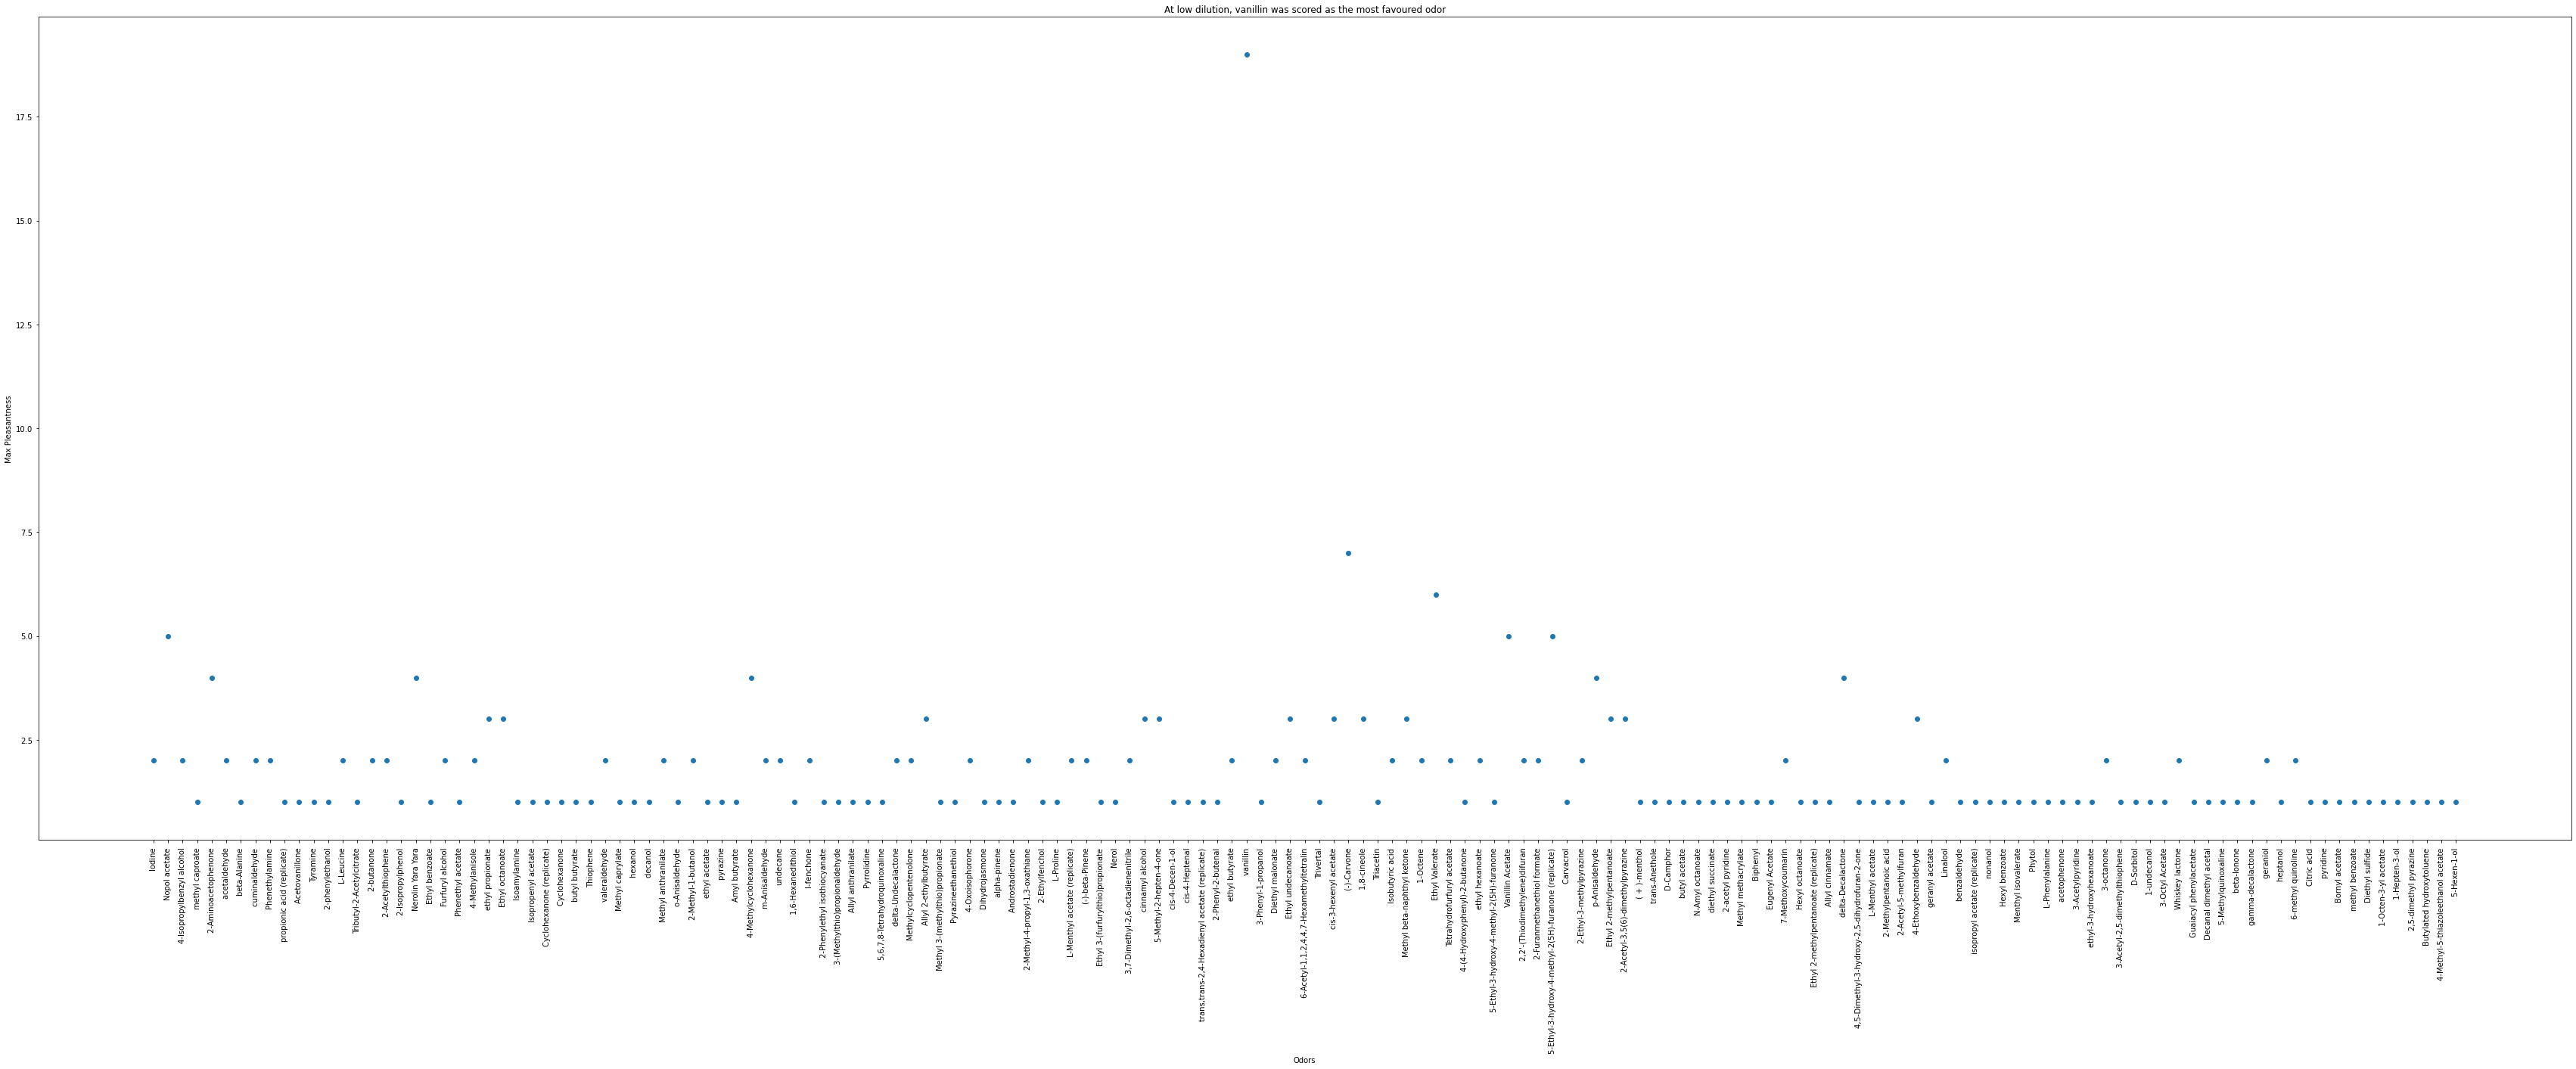

In [7]:
#Do all subjects enjoy the same odorants? in high and low dilution group
# Extract subjects
subjects = list(set(df['subject #'])) #49 repeats dont want to do every subject many times
#do it once for every subject

# Split data into high and low dilution
df_low_dilution = df[df['Intensity'] == 'low ']
df_high_dilution = df[df['Intensity'] == 'high ']

# Low dilution
favourite_odors = []
unique_odors = []
for subject in subjects:
    subject_df = df_low_dilution[df_low_dilution['subject #'] == subject]
    max_pleasantness = subject_df['VALENCE/PLEASANTNESS'].max()
    favourite_odor = list(subject_df[subject_df['VALENCE/PLEASANTNESS'] == max_pleasantness]['Odor'].values)
    favourite_odors.append(favourite_odor)
    for odor in favourite_odor:
        if not odor in unique_odors:
            unique_odors.append(odor)

odor_freq_df = pd.DataFrame(np.zeros((1,len(unique_odors))), columns=unique_odors)
for odors in favourite_odors: #loop through the list of favourite odors and add 1 every time i encounter an odor
    for odor in odors:
        odor_freq_df[odor] += 1

fig,ax = plt.subplots(figsize=(60,20))
ax.plot(odor_freq_df.iloc[0],'o')
plt.title('At low dilution, vanillin was scored as the most favoured odor')
plt.xlabel("Odors")
plt.ylabel("Max Pleasantness")
plt.xticks(rotation = 90);


odors = np.array(odor_freq_df.keys())
freqs = np.array(odor_freq_df.iloc[0])

sort_idx = np.argsort(freqs)[::-1]
#print(odors[sort_idx])


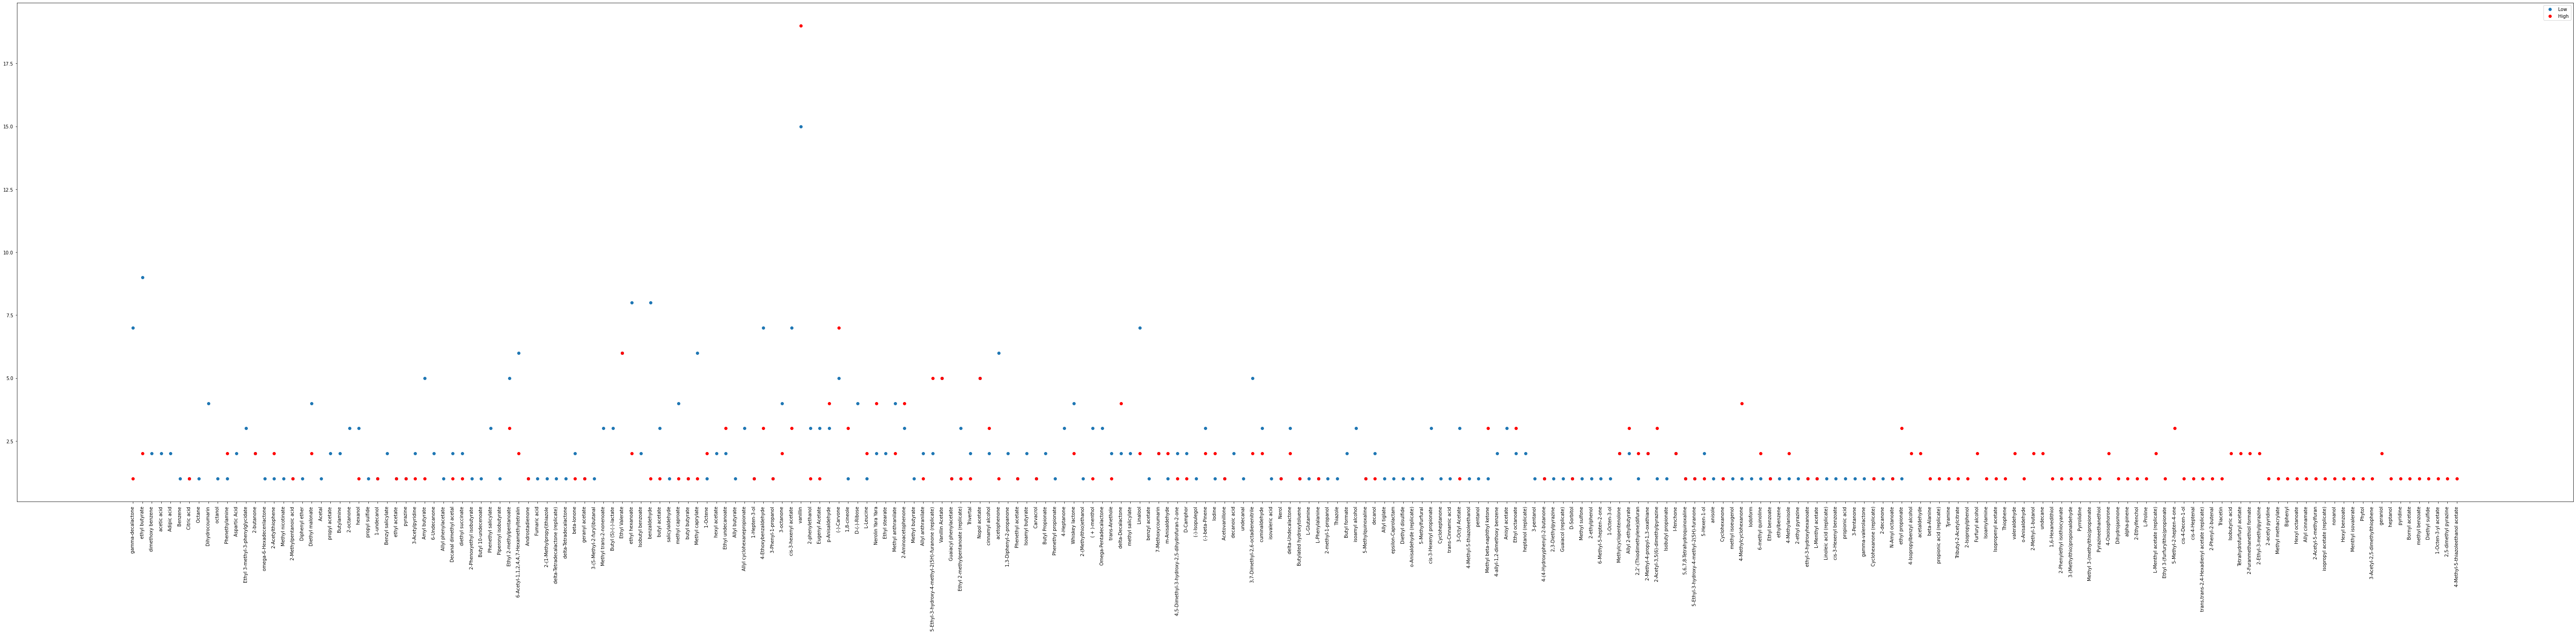

In [8]:
#find out what the max pleasantness values in each subject in low and high conditions
subjects = list(set(df['subject #']))
favourite_odors = []
unique_odors = []
for subject in subjects:
    subject_df = df_high_dilution[df_high_dilution['subject #'] == subject]
    max_pleasantness = subject_df['VALENCE/PLEASANTNESS'].max() 
    favourite_odor = list(subject_df[subject_df['VALENCE/PLEASANTNESS'] == max_pleasantness]['Odor'].values)
    favourite_odors.append(favourite_odor)
    for odor in favourite_odor:
        if not odor in unique_odors:
            unique_odors.append(odor)

odor_freq_df_low = pd.DataFrame(np.zeros((1,len(unique_odors))), columns=unique_odors)
for odors in favourite_odors:
    for odor in odors:
        odor_freq_df_low[odor] += 1

fig,ax = plt.subplots(figsize=(100,20)) #adjust image size

ax.plot(odor_freq_df_low.iloc[0],'o',label='Low')
ax.plot(odor_freq_df.iloc[0],'ro',label='High')#merge two condition (low and high)in one image\
plt.xticks(rotation = 90);

plt.legend()
odors = np.array(odor_freq_df_low.keys())
freqs = np.array(odor_freq_df_low.iloc[0])

sort_idx = np.argsort(freqs)[::-1] #argsort -> the indices of the sorted elements

53.03785942818474 16.567735362221576
                             Odor   OdorMean  OdorMeanStd  percentageStd
23    2,5-Dihydroxy-1,4-dithiane   15.270833    22.598945     147.987635
231          Methyl thiobutyrate   15.938776    21.792017     136.723282
39   2-Furanmethanethiol formate   24.959184    29.572622     118.483931
99              4-Pentenoic acid   14.695652    17.252207     117.396675
319              isovaleric acid   19.475000    22.351490     114.770167
..                            ...        ...          ...            ...
286       cis-3-Hexenyl benzoate   51.500000    14.292189      27.751823
175               Ethyl Valerate   74.521739    18.572069      24.921679
357                     vanillin   84.041667    20.420013      24.297488
1                    (-)-Carvone   78.755102    17.967019      22.813784
303              ethyl hexanoate   71.795455    16.353052      22.777280

[358 rows x 4 columns]
                            Odor   OdorMean  OdorMeanStd  perce

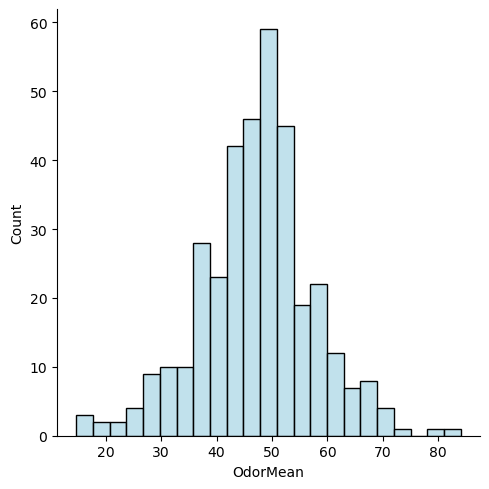

In [331]:
df = df_low_dilution.sort_values(by = "Odor")
Odors = df.Odor.unique()

OdorMean = []
OdorStd = []
OdorName = []
OdorPercentageStd=[]
for i in range(len(Odors)):
    CurrentOdor = df.loc[df['Odor']== Odors[i]]
    CurrentOdorMean =  CurrentOdor['VALENCE/PLEASANTNESS'].dropna().mean(axis=0)
    CurrentOdorStd = CurrentOdor['VALENCE/PLEASANTNESS'].dropna().std(axis = 0)
    OdorName += [Odors[i]]
    OdorMean += [CurrentOdorMean]
    OdorStd += [CurrentOdorStd]


data = {'Odor':OdorName, 'OdorMean':OdorMean,'OdorMeanStd': OdorStd}
CompoundsDf = pd.DataFrame(data)
CompoundsDf['percentageStd'] = 100*(CompoundsDf['OdorMeanStd']/CompoundsDf['OdorMean'])

stdOfRelativePercentage = CompoundsDf['percentageStd'].std(axis=0)
meanOfRelativePercentage = CompoundsDf['percentageStd'].mean(axis=0)
print(meanOfRelativePercentage,stdOfRelativePercentage)
        
low_percentageStd=CompoundsDf['percentageStd']

print(CompoundsDf.sort_values(by='percentageStd',ascending=False))

low_dilution_odor_mean=sns.displot(CompoundsDf['OdorMean'], color="lightblue")
#low_dilution_odor_mean.set_axis_labels("Low Dilution odor mean", "Pleasantness")

print(CompoundsDf.sort_values(by='OdorMean',ascending=False))


<AxesSubplot:xlabel='Vanillin', ylabel='Valence/Pleasantness'>

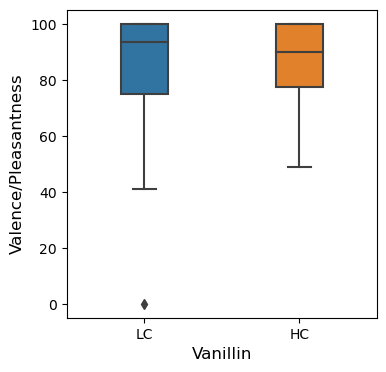

In [310]:
#make box plot of vanillin in both low and high concentration
#vanillin received the highest pleasantness scores
#vanillin was scored as the most favoured odor having the highest mean value and
LD_list = ['LC' for i in range(LD_percenSTD_Vani.shape[0])]
HD_list = ['HC' for i in range(HD_percenSTD_Vani.shape[0])]
type_list = LD_list + HD_list
LD_array = list(LD_percenSTD_Vani.to_numpy())

HD_array = list(HD_percenSTD_Vani.to_numpy())
LD_HD_list = LD_array + HD_array
LD_HD_list = list(np.array(LD_HD_list).flatten())


df = pd.DataFrame({'Valence/Pleasantness':LD_HD_list,'Vanillin':type_list})
plt.figure(figsize=(4,4))
plt.xlabel( "Vanillin" , size = 12 )
plt.ylabel( "Valence/Pleasantness" , size = 12 )
sns.boxplot(x='Vanillin',y='Valence/Pleasantness',data=df, width=0.3)




<AxesSubplot:xlabel='(-)-Carvone', ylabel='Valence/Pleasantness'>

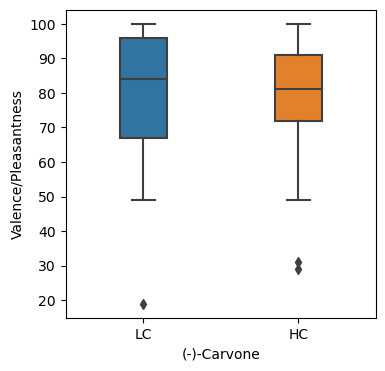

In [316]:
#second/third highest odor mean in both concentrations
LC_Carvone= df_low_dilution[df_low_dilution['Odor']== '(-)-Carvone ']
HC_Carvone=df_high_dilution[df_high_dilution['Odor']== '(-)-Carvone ']

LC_Carvone_PLEAS= LC_Carvone['VALENCE/PLEASANTNESS']
HC_Carvone_PLEAS= HC_Carvone['VALENCE/PLEASANTNESS']
LC_Carvone_DF= pd.DataFrame(LC_Carvone_PLEAS)
HC_Carvone_DF= pd.DataFrame(HC_Carvone_PLEAS)
#print(lowD_highPerStd_Odor)
L_Carvone=LC_Carvone_DF.reset_index(drop=True)
H_Carvone= HC_Carvone_DF.reset_index(drop=True)


L_carvone = ['LC' for i in range(L_Carvone.shape[0])]
H_carvone = ['HC' for i in range(H_Carvone.shape[0])]

carvonelist = L_carvone + H_carvone

L_carvone_array = list(L_Carvone.to_numpy())
H_carvone_array = list(H_Carvone.to_numpy())
carvone_arraylist = L_carvone_array + H_carvone_array
carvone_arraylist = list(np.array(carvone_arraylist).flatten())


df_carvone = pd.DataFrame({'Valence/Pleasantness':carvone_arraylist,'(-)-Carvone':carvonelist})
plt.figure(figsize=(4,4))
sns.boxplot(x='(-)-Carvone',y='Valence/Pleasantness',data=df_carvone, width=0.3)


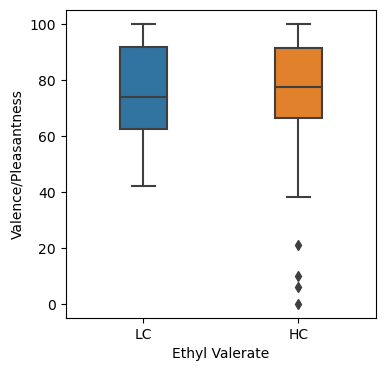

In [317]:

LC_Ethy_val=df_low_dilution[df_low_dilution['Odor']== 'Ethyl Valerate ']
LC_Ethyl_vale= LC_Ethy_val['VALENCE/PLEASANTNESS']
LC_Ethyl_vale_df= pd.DataFrame(LC_Ethyl_vale)

HC_Ethy_val=df_high_dilution[df_high_dilution['Odor']== 'Ethyl Valerate '] #methyl has the highest percentagestd
HC_Ethy_vale=HC_Ethy_val['VALENCE/PLEASANTNESS']
HC_Ethyl_vale_df=pd.DataFrame(HC_Ethy_vale)
#since methyl thiobutyrate appears in both low and high concentration
#box plot these two concentration together

Ethyl_va_L = ['LC' for i in range(LC_Ethyl_vale_df.shape[0])]
Ethyl_va_H = ['HC' for i in range(HC_Ethyl_vale_df.shape[0])]
Ethyl_val_list = Ethyl_va_L + Ethyl_va_H
L_EV_array = list(LC_Ethyl_vale_df.to_numpy())
H_EV_array = list(HC_Ethyl_vale_df.to_numpy())
Ethyl_Valerate_array = L_EV_array + H_EV_array
Ethyl_Valerate_array = list(np.array(Ethyl_Valerate_array).flatten())


df_DD = pd.DataFrame({'Valence/Pleasantness':Ethyl_Valerate_array,'Ethyl Valerate':Ethyl_val_list})
plt.figure(figsize=(4,4))
sns.boxplot(x='Ethyl Valerate',y='Valence/Pleasantness',data=df_DD,width=0.3)
plt.show()


64.69648299787517 25.70444806025291
                                      Odor   OdorMean  OdorMeanStd  \
231                   Methyl thiobutyrate    4.291667    10.285206   
46                    2-Methoxythiophenol   15.326531    22.980415   
192                                Iodine   15.021277    22.455259   
23             2,5-Dihydroxy-1,4-dithiane   17.734694    25.805987   
319                       isovaleric acid   13.604167    19.599978   
..                                     ...        ...          ...   
172  Ethyl 2-methylpentanoate (replicate)   72.446809    18.404641   
163                      Diethyl malonate   71.510204    17.330275   
303                       ethyl hexanoate   79.187500    17.136072   
1                             (-)-Carvone   78.408163    16.461974   
357                              vanillin   85.553191    14.754231   

     percentageStd  
231     239.655284  
46      149.938795  
192     149.489686  
23      145.511321  
319     144.073344

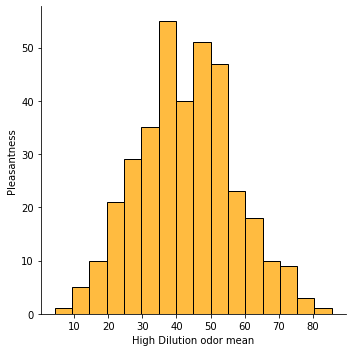

In [130]:
df_high = df_high_dilution.sort_values(by = "Odor")
Odors = df_high.Odor.unique()
OdorMean = []
OdorStd = []
OdorName = []
OdorPercentageStd=[]
for i in range(len(Odors)):
    CurrentOdor = df_high.loc[df_high['Odor']== Odors[i]]
    CurrentOdorMean =  CurrentOdor['VALENCE/PLEASANTNESS'].dropna().mean(axis=0)
    CurrentOdorStd = CurrentOdor['VALENCE/PLEASANTNESS'].dropna().std(axis = 0)
    OdorName += [Odors[i]]
    OdorMean += [CurrentOdorMean]
    OdorStd += [CurrentOdorStd]


data = {'Odor':OdorName, 'OdorMean':OdorMean,'OdorMeanStd': OdorStd}
CompoundsDf = pd.DataFrame(data)
#print(CompoundsDf)

CompoundsDf['percentageStd'] = 100*(CompoundsDf['OdorMeanStd']/CompoundsDf['OdorMean'])

stdOfRelativePercentage = CompoundsDf['percentageStd'].std(axis=0)
meanOfRelativePercentage = CompoundsDf['percentageStd'].mean(axis=0)
print(meanOfRelativePercentage,stdOfRelativePercentage)
        
high_percentageStd=CompoundsDf['percentageStd']

print(CompoundsDf.sort_values(by='percentageStd',ascending=False))

high_dilution_odor_mean=sns.displot(CompoundsDf['OdorMean'], color="orange")
high_dilution_odor_mean.set_axis_labels("High Dilution odor mean", "Pleasantness")
#plt.axvline(x=meanOfRelativePercentage, color='blue',ls='--')

print(CompoundsDf.sort_values(by='OdorMean',ascending=False))

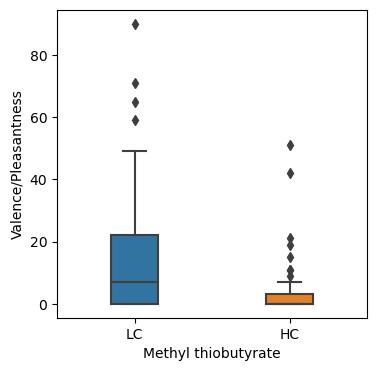

In [312]:
#second highest percentageSTD in low concentration group
#check how different the Pleasantness scores between each Subject in high persentageSTD and low dilution group
LC_Methyl_thio=df_low_dilution[df_low_dilution['Odor']== 'Methyl thiobutyrate ']
LC_Methylthio= LC_Methyl_thio['VALENCE/PLEASANTNESS']
LC_Methyl_Thio= pd.DataFrame(LC_Methylthio)

HC_Methy_thio=df_high_dilution[df_high_dilution['Odor']== 'Methyl thiobutyrate '] #methyl has the highest percentagestd
HC_Methythio=HC_Methy_thio['VALENCE/PLEASANTNESS']
HC_Methy_Thio=pd.DataFrame(HC_Methythio)
#since methyl thiobutyrate appears in both low and high concentration
#box plot these two concentration together

Methyl_thio_L = ['LC' for i in range(LC_Methyl_Thio.shape[0])]
Methyl_thio_H = ['HC' for i in range(HC_Methy_Thio.shape[0])]
Mthythio_list = Methyl_thio_L + Methyl_thio_H
LC_MTarray = list(LC_Methyl_Thio.to_numpy())
HC_MTarray = list(HC_Methy_Thio.to_numpy())
Methythio_list = LC_MTarray + HC_MTarray
Methythio_list = list(np.array(Methythio_list).flatten())


df_MT = pd.DataFrame({'Valence/Pleasantness':Methythio_list,'Methyl thiobutyrate':Mthythio_list})
plt.figure(figsize=(4,4))
sns.boxplot(x='Methyl thiobutyrate',y='Valence/Pleasantness',data=df_MT,width=0.3)
plt.show()

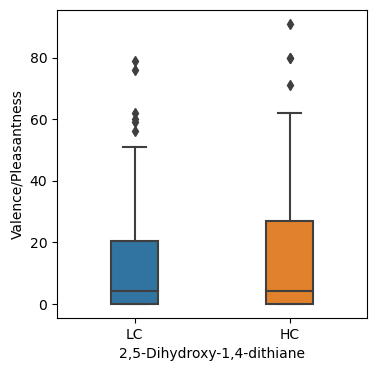

In [313]:
#2,5-Dihydroxy-1,4-dithiane pleasantness scores = one of the highest percentage STD  in both low and high concentration
LC_Dihy_dith=df_low_dilution[df_low_dilution['Odor']== '2,5-Dihydroxy-1,4-dithiane ']
L_Dihy_dith= LC_Dihy_dith['VALENCE/PLEASANTNESS']
L_Dihy_dith_df= pd.DataFrame(L_Dihy_dith)

HC_Dihy_dith=df_high_dilution[df_high_dilution['Odor']== '2,5-Dihydroxy-1,4-dithiane '] #methyl has the highest percentagestd
H_Dihy_dith=HC_Dihy_dith['VALENCE/PLEASANTNESS']
H_Dihy_dith_df=pd.DataFrame(H_Dihy_dith)
#since methyl thiobutyrate appears in both low and high concentration
#box plot these two concentration together

Dihy_dith_L = ['LC' for i in range(L_Dihy_dith_df.shape[0])]
Dihy_dith_H = ['HC' for i in range(H_Dihy_dith_df.shape[0])]
Dihy_dith_list = Dihy_dith_L + Dihy_dith_H
L_Dihydith_array = list(L_Dihy_dith_df.to_numpy())
H_Dihydith_array = list(H_Dihy_dith_df.to_numpy())
Dihydith_array_list = L_Dihydith_array + H_Dihydith_array
Dihydith_array_list = list(np.array(Dihydith_array_list).flatten())


df_DD = pd.DataFrame({'Valence/Pleasantness':Dihydith_array_list,'2,5-Dihydroxy-1,4-dithiane':Dihy_dith_list})
plt.figure(figsize=(4,4))
sns.boxplot(x='2,5-Dihydroxy-1,4-dithiane',y='Valence/Pleasantness',data=df_DD,width=0.3)
plt.show()

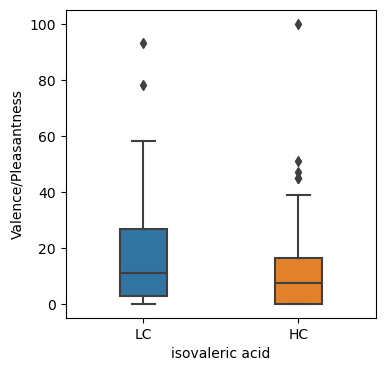

In [315]:
#isovaleric acid pleasantness scores= one of the highest percentageSTD of pleasantness in both low and high concentration
LC_isova_acid=df_low_dilution[df_low_dilution['Odor']== 'isovaleric acid ']
L_isova_acid= LC_isova_acid['VALENCE/PLEASANTNESS']
L_isova_acid_df= pd.DataFrame(L_isova_acid)

HC_isova_acid=df_high_dilution[df_high_dilution['Odor']== 'isovaleric acid '] #methyl has the highest percentagestd
H_isova_acid=HC_isova_acid['VALENCE/PLEASANTNESS']
H_isova_acid_df=pd.DataFrame(H_isova_acid)
#since methyl thiobutyrate appears in both low and high concentration
#box plot these two concentration together

Isova_acid_L = ['LC' for i in range(L_isova_acid_df.shape[0])]
Isova_acid_H = ['HC' for i in range(H_isova_acid_df.shape[0])]
Isovaacid_list = Isova_acid_L + Isova_acid_H

L_isova_array = list(L_isova_acid_df.to_numpy())
H_isova_array = list(H_isova_acid_df.to_numpy())
Isova_acid_list = L_isova_array + H_isova_array
Isova_acid_list = list(np.array(Isova_acid_list).flatten())


df_IA = pd.DataFrame({'Valence/Pleasantness':Isova_acid_list,'isovaleric acid':Isovaacid_list})
plt.figure(figsize=(4,4))
sns.boxplot(x='isovaleric acid',y='Valence/Pleasantness',data=df_IA,width=0.3)
plt.show()

In [133]:
#what's the highest descriptor scores in each subject(person)
rows_low_dilution=df_low_dilution.iloc[0:, 8:].dropna()
intensity_low_dilution=df_low_dilution.iloc[0:,]
#each individual in low dilution group what's their highest value between these odor
rows_low_dilution['MaxOdorValue'] = rows_low_dilution.max(axis=1)
rows_low_dilution['MaxOdor'] = rows_low_dilution.idxmax(axis=1)
low_preferred_odor=np.array(list(zip(rows_low_dilution['MaxOdorValue'], rows_low_dilution['MaxOdor'],)))

low_dilution_preferred_odor =[]
for i in range(len(low_preferred_odor)):
    if not(low_preferred_odor[i][0] == '0.0' and low_preferred_odor[i][1] == 'BAKERY'):
        low_dilution_preferred_odor += [low_preferred_odor[i]]
low_dilution_preferred_odor=pd.DataFrame(low_dilution_preferred_odor)
print(low_dilution_preferred_odor)

#what's the max value of these descriptors in each subject
rows_high_dilution=df_high_dilution.iloc[0:, 8:].dropna()
rows_high_dilution['MaxOdorValue'] = rows_high_dilution.max(axis=1)
rows_high_dilution['MaxOdor'] = rows_high_dilution.idxmax(axis=1)
high_preferred_odor=np.array(list(zip(rows_high_dilution['MaxOdorValue'], rows_high_dilution['MaxOdor'])))

high_dilution_preferred_odor =[]
for i in range(len(high_preferred_odor)):
    if not(high_preferred_odor[i][0] == '0.0' and high_preferred_odor[i][1] == 'BAKERY'):
        high_dilution_preferred_odor += [high_preferred_odor[i]]
high_dilution_preferred_odor=pd.DataFrame(high_dilution_preferred_odor)
print(high_dilution_preferred_odor)
#already remove subjects that have all descriptor = 0 
#so the first person has the highest descriptor scores in sweaty which is 21 in high dilution

         0         1
0     21.0    SWEATY
1     33.0     SWEET
2     62.0     SWEET
3     88.0    FLOWER
4     49.0   DECAYED
...    ...       ...
9793  15.0  CHEMICAL
9794  44.0      WOOD
9795  50.0     GRASS
9796   2.0    FLOWER
9797  19.0     MUSKY

[9798 rows x 2 columns]
          0         1
0      72.0     SWEET
1      11.0    SPICES
2      92.0    FLOWER
3      37.0     MUSKY
4      24.0  CHEMICAL
...     ...       ...
14240  45.0    BAKERY
14241   1.0    BAKERY
14242  56.0    BAKERY
14243  60.0      WARM
14244  80.0  CHEMICAL

[14245 rows x 2 columns]


In [ ]:
›